In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
games = pd.read_csv('Data/games.csv')
gps = pd.read_csv('Data/gps.csv', low_memory=False)
rpe = pd.read_csv('Data/rpe.csv')
wellness = pd.read_csv('Data/wellness.csv')

In [5]:
datafest = pd.read_excel('DataFest 2019 - Codebook.xlsx')

In [6]:
datafest

,Variable,Description
0,GameID,Unique identifier for the game
1,Date,Date on which the game was played
2,Tournament,Tournament that hosts game
3,TournamentGame,The game number of the tournament (1 = 1st gam...
4,Team,Canada
5,Opponent,The country that Canada played against
6,Outcome,"W if Canada won the game, L if Canada lost"
7,TeamPoints,Number of points that Canada scored
8,TeamPointsAllowed,Number of points that the opposing team scored


In [139]:
games['Date'].unique()

array(['2017-11-30', '2017-12-01', '2018-01-26', '2018-01-27',
       '2018-01-28', '2018-04-13', '2018-04-14', '2018-04-15',
       '2018-04-21', '2018-04-22', '2018-05-12', '2018-05-13',
       '2018-06-08', '2018-06-09', '2018-06-10', '2018-07-20', '2018-07-21'], dtype=object)

In [7]:
games.head()

,GameID,Date,Tournament,TournamentGame,Team,Opponent,Outcome,TeamPoints,TeamPointsAllowed
0,1,2017-11-30,Dubai,1,Canada,Spain,W,19,0
1,2,2017-11-30,Dubai,2,Canada,Ireland,W,31,0
2,3,2017-11-30,Dubai,3,Canada,Fiji,W,31,14
3,4,2017-12-01,Dubai,4,Canada,France,W,24,19
4,5,2017-12-01,Dubai,5,Canada,Australia,L,7,25


In [8]:
gps.head()

,GameID,Half,PlayerID,FrameID,Time,GameClock,Speed,AccelImpulse,AccelLoad,AccelX,AccelY,AccelZ,Longitude,Latitude
0,1,1,2,1,00:22:01,00:00:00,0.658334,0.611112,0.005330,0.13250,0.69875,0.56500,55.466666,24.994873
1,1,1,2,2,00:22:01,00:00:00,0.594445,0.638889,0.006568,0.11125,0.92000,0.70625,55.466666,24.994874
2,1,1,2,3,00:22:01,00:00:00,0.363889,2.305557,0.003114,0.01375,0.77000,0.67750,55.466667,24.994874
3,1,1,2,4,00:22:01,00:00:00,0.444445,0.805556,0.002602,0.00625,0.88625,0.59500,55.466667,24.994874
4,1,1,2,5,00:22:01,00:00:00,0.400000,0.444445,0.003813,-0.01750,0.85750,0.57375,55.466668,24.994874


In [9]:
rpe.head()

,Date,PlayerID,Training,SessionType,Duration,RPE,SessionLoad,DailyLoad,AcuteLoad,ChronicLoad,AcuteChronicRatio,ObjectiveRating,FocusRating,BestOutOfMyself
0,2018-07-21,13,Yes,Mobility/Recovery,5.0,0.0,0.0,446.0,323.1,303.25,1.07,NaN,NaN,Not at all
1,2018-07-21,13,Yes,Game,29.0,7.0,203.0,NaN,NaN,NaN,NaN,NaN,NaN,Not at all
2,2018-07-21,13,Yes,Game,27.0,9.0,243.0,NaN,NaN,NaN,NaN,NaN,NaN,Not at all
3,2018-07-20,11,Yes,Game,36.0,6.0,216.0,534.0,256.3,344.18,0.74,9.0,10.0,Absolutely
4,2018-07-20,11,Yes,Game,36.0,8.0,288.0,NaN,NaN,NaN,NaN,9.0,10.0,Absolutely


In [10]:
wellness.head()

,Date,PlayerID,Fatigue,Soreness,Desire,Irritability,BedTime,WakeTime,SleepHours,SleepQuality,MonitoringScore,Pain,Illness,Menstruation,Nutrition,NutritionAdjustment,USGMeasurement,USG,TrainingReadiness
0,2018-07-21,1,3,3,2,3,23:00:00,07:00:00,8.00,2,13,No,No,Yes,Excellent,Yes,No,NaN,0%
1,2018-07-21,2,4,3,4,4,23:00:00,07:00:00,8.00,4,19,Yes,No,Yes,NaN,NaN,Yes,1.010,0%
2,2018-07-21,3,3,3,5,4,22:30:00,06:30:00,8.00,4,19,No,No,No,NaN,NaN,Yes,1.016,100%
3,2018-07-21,4,2,3,5,4,00:30:00,07:00:00,6.50,1,15,No,No,Yes,Excellent,Yes,Yes,1.025,95%
4,2018-07-21,5,5,3,4,4,23:45:00,07:00:00,7.25,4,20,No,No,No,Okay,Yes,Yes,1.022,100%


In [11]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
GameID               38 non-null int64
Date                 38 non-null object
Tournament           38 non-null object
TournamentGame       38 non-null int64
Team                 38 non-null object
Opponent             38 non-null object
Outcome              38 non-null object
TeamPoints           38 non-null int64
TeamPointsAllowed    38 non-null int64
dtypes: int64(4), object(5)
memory usage: 2.8+ KB


In [12]:
gps.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4570160 entries, 0 to 4570159
Data columns (total 14 columns):
GameID          int64
Half            int64
PlayerID        int64
FrameID         int64
Time            object
GameClock       object
Speed           float64
AccelImpulse    float64
AccelLoad       float64
AccelX          float64
AccelY          float64
AccelZ          float64
Longitude       float64
Latitude        float64
dtypes: float64(8), int64(4), object(2)
memory usage: 488.1+ MB


In [13]:
rpe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8860 entries, 0 to 8859
Data columns (total 14 columns):
Date                 8860 non-null object
PlayerID             8860 non-null int64
Training             8860 non-null object
SessionType          7621 non-null object
Duration             7621 non-null float64
RPE                  7621 non-null float64
SessionLoad          7621 non-null float64
DailyLoad            3149 non-null float64
AcuteLoad            4349 non-null float64
ChronicLoad          4383 non-null float64
AcuteChronicRatio    4349 non-null float64
ObjectiveRating      4724 non-null float64
FocusRating          4751 non-null float64
BestOutOfMyself      3019 non-null object
dtypes: float64(9), int64(1), object(4)
memory usage: 969.1+ KB


In [14]:
wellness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Data columns (total 19 columns):
Date                   5011 non-null object
PlayerID               5011 non-null int64
Fatigue                5011 non-null int64
Soreness               5011 non-null int64
Desire                 5011 non-null int64
Irritability           5011 non-null int64
BedTime                5011 non-null object
WakeTime               5011 non-null object
SleepHours             5011 non-null float64
SleepQuality           5011 non-null int64
MonitoringScore        5011 non-null int64
Pain                   5011 non-null object
Illness                5011 non-null object
Menstruation           4995 non-null object
Nutrition              4174 non-null object
NutritionAdjustment    4266 non-null object
USGMeasurement         4843 non-null object
USG                    629 non-null float64
TrainingReadiness      5011 non-null object
dtypes: float64(2), int64(7), object(10)
memory usage: 743.9+ K

## Wellness Imputation

In [15]:
wellness['Menstruation'].value_counts()

No     4285
Yes     710
Name: Menstruation, dtype: int64

In [16]:
wellness['Menstruation'].fillna(value='No', inplace=True)

In [17]:
wellness['USG'] = wellness.apply(lambda x: wellness.groupby('PlayerID')['USG'].median()[x['PlayerID']], axis=1)

In [18]:
wellness['Nutrition'] = wellness.apply(lambda x: wellness.groupby('PlayerID')['Nutrition'].value_counts()[x['PlayerID']].index[0], axis=1)

In [19]:
wellness['NutritionAdjustment'] = wellness.apply(lambda x: wellness.groupby('PlayerID')['NutritionAdjustment'].value_counts()[x['PlayerID']].index[0], axis=1)

In [20]:
wellness['USGMeasurement'].fillna(value='Yes', inplace=True)

In [21]:
wellness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Data columns (total 19 columns):
Date                   5011 non-null object
PlayerID               5011 non-null int64
Fatigue                5011 non-null int64
Soreness               5011 non-null int64
Desire                 5011 non-null int64
Irritability           5011 non-null int64
BedTime                5011 non-null object
WakeTime               5011 non-null object
SleepHours             5011 non-null float64
SleepQuality           5011 non-null int64
MonitoringScore        5011 non-null int64
Pain                   5011 non-null object
Illness                5011 non-null object
Menstruation           5011 non-null object
Nutrition              5011 non-null object
NutritionAdjustment    5011 non-null object
USGMeasurement         5011 non-null object
USG                    5011 non-null float64
TrainingReadiness      5011 non-null object
dtypes: float64(2), int64(7), object(10)
memory usage: 743.9+ 

## RPE Imputation

In [101]:
rpe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8860 entries, 0 to 8859
Data columns (total 14 columns):
Date                 8860 non-null object
PlayerID             8860 non-null int64
Training             8860 non-null object
SessionType          7621 non-null object
Duration             7621 non-null float64
RPE                  7621 non-null float64
SessionLoad          7621 non-null float64
DailyLoad            3149 non-null float64
AcuteLoad            4349 non-null float64
ChronicLoad          4383 non-null float64
AcuteChronicRatio    4349 non-null float64
ObjectiveRating      4724 non-null float64
FocusRating          4751 non-null float64
BestOutOfMyself      3019 non-null object
dtypes: float64(9), int64(1), object(4)
memory usage: 969.1+ KB


In [102]:
rpe['SessionType'].value_counts()

Strength             1909
Skills               1859
Speed                1245
Mobility/Recovery     992
Conditioning          960
Game                  463
Combat                193
Name: SessionType, dtype: int64

In [103]:
def fill_cat_data_gb_player(data, col):
    return data.apply(lambda x: data.groupby('PlayerID')[col].value_counts()[x['PlayerID']].index[0], axis=1)

def fill_quant_data_gb_player(data, col):
    return data.apply(lambda x: data.groupby('PlayerID')[col].median()[x['PlayerID']], axis=1)

In [104]:
rpe['SessionType'] = fill_cat_data_gb_player(rpe, 'SessionType')
rpe['BestOutOfMyself'] = fill_cat_data_gb_player(rpe, 'BestOutOfMyself')

In [105]:
rpe_float_cols = rpe.columns[rpe.dtypes == 'float64']

for col in rpe_float_cols:
    rpe[col] = fill_quant_data_gb_player(rpe, col)

In [106]:
rpe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8860 entries, 0 to 8859
Data columns (total 14 columns):
Date                 8860 non-null object
PlayerID             8860 non-null int64
Training             8860 non-null object
SessionType          8860 non-null object
Duration             8860 non-null float64
RPE                  8860 non-null float64
SessionLoad          8860 non-null float64
DailyLoad            8860 non-null float64
AcuteLoad            8860 non-null float64
ChronicLoad          8860 non-null float64
AcuteChronicRatio    8860 non-null float64
ObjectiveRating      8860 non-null float64
FocusRating          8860 non-null float64
BestOutOfMyself      8860 non-null object
dtypes: float64(9), int64(1), object(4)
memory usage: 969.1+ KB


## Baseline Model With Only Wellness Measures

In [167]:
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

In [82]:
def printErrors(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    errorsDict = {"MAE": mae, 
                  "MSE": mse, 
                  "RMSE": rmse}
    
    #R-squared value: measure of how much of the variability is explained in our model
    r_square = explained_variance_score(y_test, y_pred)
    print("r-squared: {}".format(r_square))

    for k, v in sorted(errorsDict.items()):
        print("{}: {}".format(k, v))
        
def printClassificationErrors(y_test, y_pred):
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred)))

In [23]:
numerical_features = wellness.columns[wellness.dtypes != 'object']
categorical_features = wellness.columns[wellness.dtypes == 'object']

In [25]:
data = pd.get_dummies(data=wellness, columns=categorical_features)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Columns: 501 entries, PlayerID to TrainingReadiness_95%
dtypes: float64(2), int64(7), uint8(492)
memory usage: 2.7 MB


In [28]:
X = data.drop(['Fatigue', 'Date'], axis=1)
y = data['Fatigue']

In [30]:
columns = X.columns
sc = StandardScaler()
X[columns] = sc.fit_transform(X[columns])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [73]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
printErrors(y_test, y_pred)

r-squared: 0.9029573410190773
MAE: 0.01841952459504398
MSE: 0.10100263444109793
RMSE: 0.3178091163593296


In [83]:
logr = LogisticRegressionCV(penalty='l2')
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)
printClassificationErrors(y_test, y_pred)

Confusion Matrix:
[[  2  44  16   0   0   0   0]
 [  7  79 124   2   0   0   0]
 [  5  40 374 143   4   2   0]
 [  7   0 119 519   9   7   0]
 [  0   0  10  82   2   5   0]
 [  0   0   0  25   1  24   0]
 [  0   0   0   2   0   0   0]]
Classification Report:
             precision    recall  f1-score   support

          1       0.10      0.03      0.05        62
          2       0.48      0.37      0.42       212
          3       0.58      0.66      0.62       568
          4       0.67      0.79      0.72       661
          5       0.12      0.02      0.03        99
          6       0.63      0.48      0.55        50
          7       0.00      0.00      0.00         2

avg / total       0.56      0.60      0.58      1654

Accuracy Score: 0.6045949214026602


/Users/Raymond/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Baseline Model With Both RPE & Wellness

In [153]:
pd.set_option('max_columns', 31)
data = rpe.merge(wellness, how='inner', left_on=['PlayerID', 'Date'], right_on=['PlayerID', 'Date'])
data.head()

,Date,PlayerID,Training,SessionType,Duration,RPE,SessionLoad,DailyLoad,AcuteLoad,ChronicLoad,AcuteChronicRatio,ObjectiveRating,FocusRating,BestOutOfMyself,Fatigue,Soreness,Desire,Irritability,BedTime,WakeTime,SleepHours,SleepQuality,MonitoringScore,Pain,Illness,Menstruation,Nutrition,NutritionAdjustment,USGMeasurement,USG,TrainingReadiness
0,2018-07-21,13,Yes,Mobility/Recovery,45.0,5.0,180.0,450.0,325.6,372.86,0.89,8.0,9.0,Not at all,4,3,5,4,23:15:00,07:15:00,8.00,4,20,No,No,No,Excellent,Yes,Yes,1.0185,100%
1,2018-07-21,13,Yes,Mobility/Recovery,45.0,5.0,180.0,450.0,325.6,372.86,0.89,8.0,9.0,Not at all,4,3,5,4,23:15:00,07:15:00,8.00,4,20,No,No,No,Excellent,Yes,Yes,1.0185,100%
2,2018-07-21,13,Yes,Mobility/Recovery,45.0,5.0,180.0,450.0,325.6,372.86,0.89,8.0,9.0,Not at all,4,3,5,4,23:15:00,07:15:00,8.00,4,20,No,No,No,Excellent,Yes,Yes,1.0185,100%
3,2018-07-20,11,Yes,Skills,50.0,4.0,225.0,670.0,381.4,428.61,0.88,8.0,9.0,Absolutely,4,4,6,4,23:00:00,07:15:00,8.25,4,22,No,Slightly Off,No,Excellent,Yes,Yes,1.0150,100%
4,2018-07-20,11,Yes,Skills,50.0,4.0,225.0,670.0,381.4,428.61,0.88,8.0,9.0,Absolutely,4,4,6,4,23:00:00,07:15:00,8.25,4,22,No,Slightly Off,No,Excellent,Yes,Yes,1.0150,100%


In [154]:
data = data.groupby(['Date', 'PlayerID']).max().reset_index()

In [155]:
data['Date'] = pd.to_datetime(data['Date'])
numerical_features = data.columns[data.dtypes != 'object']
categorical_features = data.columns[data.dtypes == 'object']

data = pd.get_dummies(data=data, columns=categorical_features)

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4085 entries, 0 to 4084
Columns: 161 entries, Date to TrainingReadiness_95%
dtypes: datetime64[ns](1), float64(11), int64(7), uint8(142)
memory usage: 1.1 MB


In [157]:
X = data.drop(['Fatigue', 'Date'], axis=1)
y = data['Fatigue']

In [158]:
columns = X.columns
sc = StandardScaler()
X[columns] = sc.fit_transform(X[columns])

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [160]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
printErrors(y_test, y_pred)

r-squared: 0.6847517651977939
MAE: 0.05047550674450054
MSE: 0.33069963591226315
RMSE: 0.5750648971309787


In [168]:
logr = LogisticRegression(penalty='l2')
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)
printClassificationErrors(y_test, y_pred)

Confusion Matrix:
[[ 11  38   5   0   0   0   0]
 [ 11  77  92   2   0   0   0]
 [  4  12 394  71   1   0   0]
 [  0   0  62 440  13   2   0]
 [  0   0   2  51  15   2   0]
 [  0   0   0   9   4  30   0]
 [  0   0   0   1   0   0   0]]
Classification Report:
             precision    recall  f1-score   support

          1       0.42      0.20      0.27        54
          2       0.61      0.42      0.50       182
          3       0.71      0.82      0.76       482
          4       0.77      0.85      0.81       517
          5       0.45      0.21      0.29        70
          6       0.88      0.70      0.78        43
          7       0.00      0.00      0.00         1

avg / total       0.70      0.72      0.70      1349

Accuracy Score: 0.7168272794662713


/Users/Raymond/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [145]:
data2 = rpe.merge(wellness, how='inner', left_on=['PlayerID', 'Date'], right_on=['PlayerID', 'Date'])
data2 = data2.groupby(['Date', 'PlayerID']).max().reset_index()

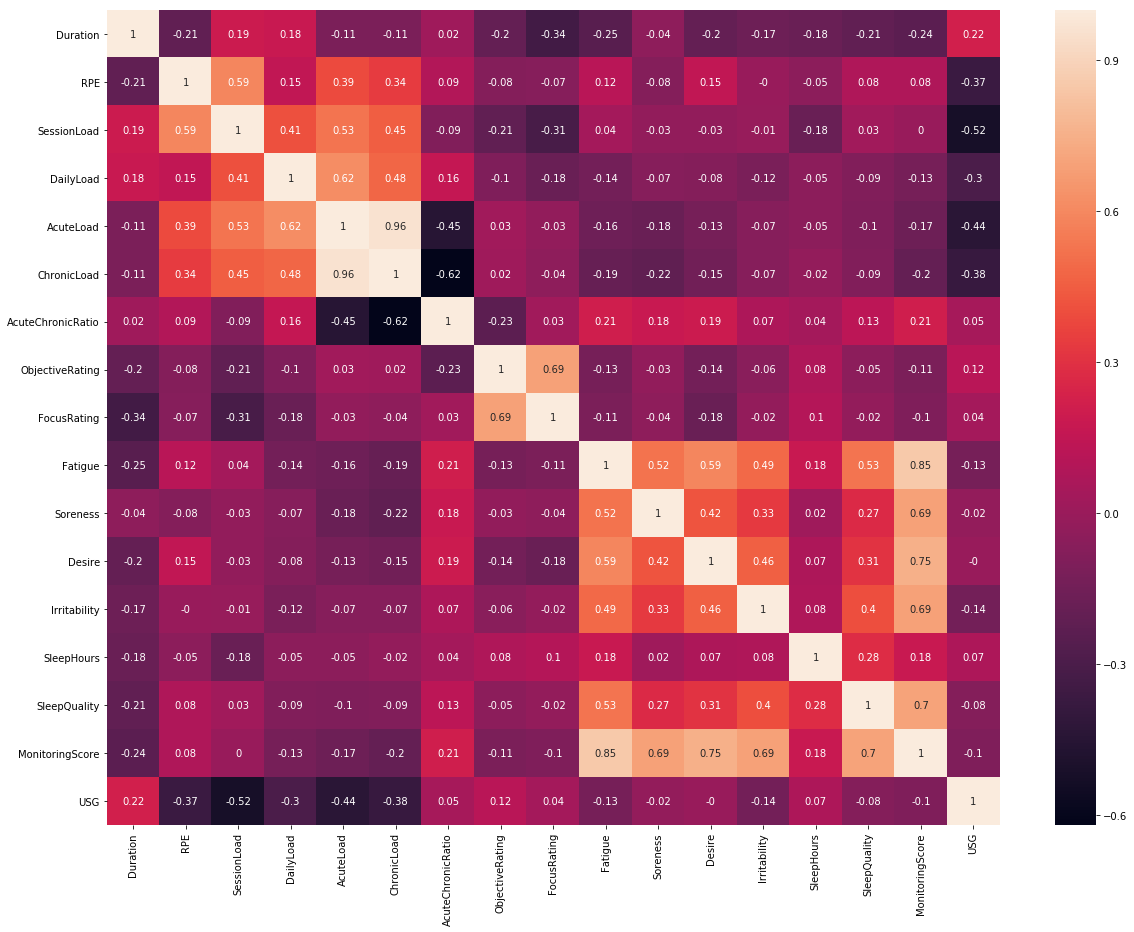

In [151]:
plt.figure(figsize=(20, 15))
sns.heatmap(round(data2[data2.columns[data2.dtypes != 'object']].drop(['PlayerID'], axis=1).corr(), 2), annot=True)